___
# Ciência dos Dados - PROJETO 1

## Samuel Granato
___

## Acesso à internet em diferentes regiões do Brasil e a relação com o socio-econômico

___
## Introdução

O acesso à internet pode variar em diferentes regiões do Brasil, mesmo que não seja influenciada pela renda, mas sim pela cultura?

___
## Análise e Resultados

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

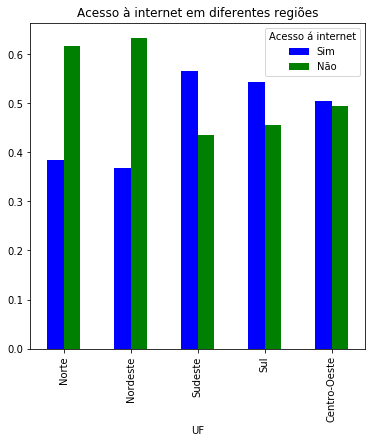

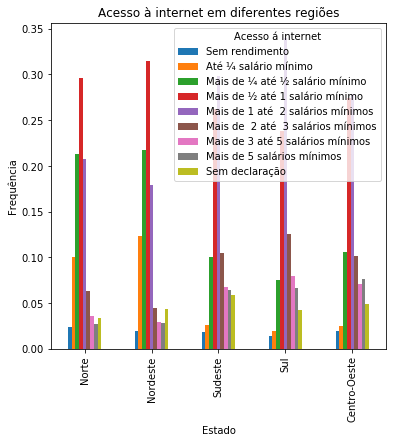

2         350.0
3         339.0
4         266.0
5         400.0
6         411.0
10        280.0
11        333.0
14        650.0
15        678.0
19        500.0
20        666.0
25        658.0
26        271.0
29        800.0
30        169.0
33        372.0
35        550.0
36        862.0
38        559.0
40        447.0
41        339.0
42        212.0
43        335.0
44        533.0
45          0.0
46        466.0
47        705.0
48        109.0
49        600.0
50          0.0
          ...  
148621    559.0
148626    843.0
148627    550.0
148628    618.0
148630    339.0
148631    410.0
148636    339.0
148639    462.0
148640    400.0
148644    192.0
148645      0.0
148646    800.0
148648    764.0
148649    750.0
148651      0.0
148655    640.0
148657      0.0
148661    800.0
148663    366.0
148680    538.0
148681    150.0
148683    750.0
148684    600.0
148687    356.0
148689    750.0
148690    516.0
148692    800.0
148693    100.0
148694    387.0
148695    400.0
Name: Renda, Length: 737

In [41]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 16 09:23:16 2017

@author: Samuel
"""

import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_table("DOM2013.csv", encoding="windows-1252", sep=",")
pd.options.mode.chained_assignment = None

dados.V02322 =dados.V02322 .astype("category")
dados.V02322.cat.categories = ("Sim","Não")
dados['FUF']=pd.Series(dados.UF)
dados['FV4622']=pd.Series(dados.V4622)
dados['FV02322']=pd.Series(dados.V02322)
dados['FV4621']=pd.Series(dados.V4621)
dados.FUF=dados.FUF.dropna()
dados.FV4622=dados.FV4622.dropna()
dados.FV02322=dados.FV02322.dropna()
dados.FV4621=dados.FV4621.dropna()

pd.to_numeric(dados.UF)
dados.FUF[(dados.FUF>10) & (dados.FUF<20)] = [1]
dados.FUF[(dados.FUF>20) & (dados.FUF<30)] = [2]
dados.FUF[(dados.FUF>30) & (dados.FUF<40)] = [3]
dados.FUF[(dados.FUF>40) & (dados.FUF<50)] = [4]
dados.FUF[(dados.FUF>50)] = [50]

dados['Renda']=pd.Series(dados.FV4621)
pd.to_numeric(dados.FV4621)
dados.Renda=dados.Renda[(dados.Renda<937)]


dados.FUF = dados.FUF.astype("category")
dados.FV4622 = dados.FV4622.astype("category")
dados.FV4622.cat.categories = ("Sem rendimento",
"Até ¼ salário mínimo",
"Mais de ¼ até ½ salário mínimo",
"Mais de ½ até 1 salário mínimo",
"Mais de 1 até  2 salários mínimos",
"Mais de  2 até  3 salários mínimos",
"Mais de 3 até 5 salários mínimos",
"Mais de 5 salários mínimos",
"Sem declaração")
dados.FUF.cat.categories = ("Norte","Nordeste","Sudeste","Sul","Centro-Oeste")

crosstable=pd.crosstab(dados.FUF,dados.FV02322,rownames=['UF'],normalize='index', colnames=['Acesso á internet'])
plot = crosstable.plot(kind='bar',title='Acesso à internet em diferentes regiões',figsize=(6, 6),color=('b','g'))
plt.ylabel('Frequência')
plt.xlabel('Estado')
plt.show()


dados.FRenda=dados.Renda.dropna()
dados.FRenda=dados.FRenda[dados.FRenda<978]





O acesso à internet é menor nas regiões norte e nordeste

___
## Conclusão 

Descreva aqui suas conclusões!